# Decision Tree Classifier

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [20]:
data_folder = "../Data"
train_file = "/adult.data.txt"
test_file = "/adult.test.txt"
cols = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship",
        "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

train_df = pd.read_csv(data_folder + train_file, names=cols, header=None)
test_df  = pd.read_csv(data_folder + test_file, names=cols, skiprows=1)

In [21]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
train_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Preprocessing

In [23]:
# One Hot Encoding
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
train_df = pd.get_dummies(train_df, columns=categorical_cols)
test_df = pd.get_dummies(test_df, columns=categorical_cols)
test_df["native-country_ Holand-Netherlands"] = 0

In [24]:
# convert class to 0 or 1
train_df["class"] = train_df["class"].astype('category')
train_df["class"] = train_df["class"].cat.codes
test_df["class"]  = test_df["class"].astype('category')
test_df["class"]  = test_df["class"].cat.codes

## Decision Tree Classification

In [25]:
X_train = train_df.drop("class", axis=1).as_matrix()
y_train = train_df["class"].as_matrix()
X_test = test_df.drop("class", axis=1).as_matrix()
y_test = test_df["class"].as_matrix()

In [49]:
clf = DecisionTreeClassifier(random_state=0)
t0 = time()
clf.fit(X_train, y_train) 
n_folds = 10
scores = cross_val_score(clf, X_train, y_train, cv=n_folds)
t1 = time()
y_pred = cross_val_predict(clf, X_test, y_test, cv=n_folds)
print ("Prediction time:", round(time() - t1, 3), "s")
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy: {:.2f}%".format(accuracy))

Prediction time: 3.128 s
Accuracy: 0.81%


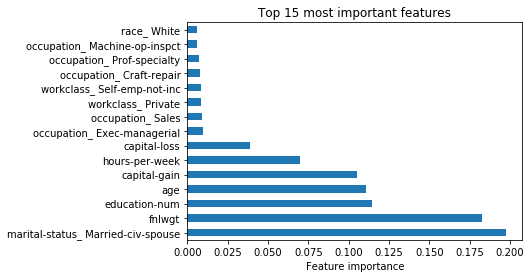

In [47]:
pd.Series(clf.feature_importances_, index=train_df.drop("class", axis=1).columns).nlargest(15).plot(kind='barh')
plt.title("Top 15 most important features")
plt.xlabel("Feature importance")
plt.show()